In [1]:
import os
from dotenv import load_dotenv
from matplotlib import pyplot as plt

from quantuminspire.credentials import enable_account
from quantuminspire.qiskit import QI

from qiskit_aer import Aer

from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper

from src.qiskit.evaluation import manual_vqe
from src.qiskit.evaluation.hydrogen_system.hydrogen_system import HydrogenSystem

In [2]:
load_dotenv()
api_token = os.getenv('QI_API_TOKEN')

project_name = 'Orbitals - Speeding up Chemistry Simulations'

enable_account(api_token)
QI.set_authentication(project_name=project_name)

qi_backend = QI.get_backend('QX single-node simulator')
simulated_backend = Aer.get_backend("qasm_simulator")

/var/folders/6s/q0ttmhtn4jn5782f1n91hg8h0000gn/T/ipykernel_5721/751153530.py:9: DeprecationWarning: The method ``qiskit.providers.provider.ProviderV1.get_backend()`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will  be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.
  qi_backend = QI.get_backend('QX single-node simulator')


In [3]:
hydrogen_num_particles = (1, 1)

jordan_wigner_mapper = JordanWignerMapper()
parity_mapper = ParityMapper(num_particles=hydrogen_num_particles)

hydrogen_system = HydrogenSystem(0.735, parity_mapper, use_tapered_mapper=True)

In [4]:
result, cost_history = manual_vqe.vqe_calculation(0.735, hydrogen_system, backend=qi_backend)

print(result)

/Users/benjamin/Code Projects/HvA/biodac-speeding-up-chemistry-simulations/venv/lib/python3.12/site-packages/qiskit/providers/backend_compat.py:126: RuntimeWarning: No gate definition for barrier can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
/Users/benjamin/Code Projects/HvA/biodac-speeding-up-chemistry-simulations/venv/lib/python3.12/site-packages/qiskit/providers/backend_compat.py:126: RuntimeWarning: No gate definition for snapshot can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The ex

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.135965611968143
       x: [-1.373e-01]
    nfev: 21
   maxcv: 0.0


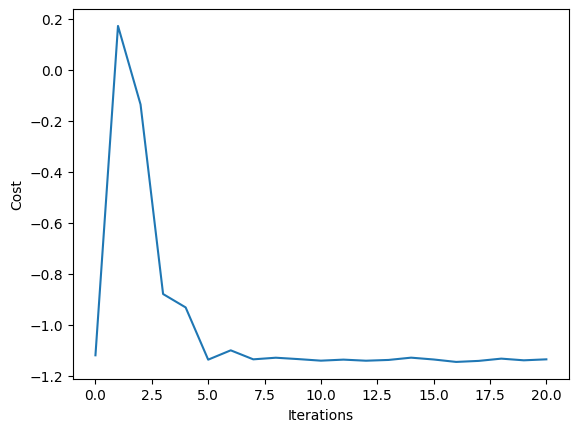

In [5]:
fig, ax = plt.subplots()
ax.plot(range(cost_history["iters"]), cost_history["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()